In [31]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from prophet import Prophet
m = Prophet()

In [32]:
# Importamos el dataset para los 5 años de cobertura
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
data_2015 = pd.read_csv('flujo-vehicular-2015.csv', sep =',')

In [33]:
# Implementamos los mismos filtros que los usados en el Proyecto #3
# Tomamos los datos de la autopista Illia, pago en Efectivo.
# Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017, data_2016, data_2015])
dataset.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,hora
0,2019,2019-01-01,0.0,1.0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,NaN
1,2019,2019-01-01,0.0,1.0,Martes,Alberti,Centro,Liviano,TELEPASE,6,NaN
2,2019,2019-01-01,0.0,1.0,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,NaN
3,2019,2019-01-01,0.0,1.0,Martes,Alberti,Provincia,Liviano,TELEPASE,18,NaN
4,2019,2019-01-01,0.0,1.0,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,NaN


In [34]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo. Agregamos solo a los vehiculos livianos
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago =='EFECTIVO')
#mask = np.logical_and(dataset.estacion=='Illia', dataset.tipo_vehiculo =='Liviano' )
dataset = dataset[mask]

dataset.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,hora
80,2019,2019-01-01,1.0,2.0,Martes,Illia,Centro,Liviano,EFECTIVO,537,NaN
86,2019,2019-01-01,1.0,2.0,Martes,Illia,Centro,Pesado,EFECTIVO,1,NaN
88,2019,2019-01-01,1.0,2.0,Martes,Illia,Provincia,Liviano,EFECTIVO,443,NaN
94,2019,2019-01-01,1.0,2.0,Martes,Illia,Provincia,Pesado,EFECTIVO,1,NaN
149,2019,2019-01-01,2.0,3.0,Martes,Illia,Centro,Liviano,EFECTIVO,769,NaN


In [35]:
dataset.shape

(409257, 11)

In [36]:
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo', 'hora_inicio', 'hora_fin' ,'forma_pago', 'dia', 'estacion', 'sentido', 'tipo_vehiculo', 'hora'], inplace = True)

dataset.head()

,fecha,cantidad_pasos
80,2019-01-01,537
86,2019-01-01,1
88,2019-01-01,443
94,2019-01-01,1
149,2019-01-01,769


In [37]:
dataset.shape

(409257, 2)

In [38]:
# Modificamos los titulos para adaptar ambas filas en Prophet
dataset.columns = ['ds','y']
dataset.head()

,ds,y
80,2019-01-01,537
86,2019-01-01,1
88,2019-01-01,443
94,2019-01-01,1
149,2019-01-01,769


In [67]:
# Realizamos el fiteo correspondiente dentro de Prophet. En el mismo insertamos una predicción de 1 trimestre (365  días)
m=Prophet()
m.fit(dataset)
future=m.make_future_dataframe(periods=365)   # Predicción 365 días
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
2182,2020-12-26
2183,2020-12-27
2184,2020-12-28
2185,2020-12-29
2186,2020-12-30


In [68]:
# Una vez que tenemos ese nuevo dataframe, ahora si usamos el metodo predict del modelo.
forecast=m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2182,2020-12-26,702.930779,-81.823129,1511.382066
2183,2020-12-27,691.800590,-86.809180,1488.471169
2184,2020-12-28,718.530867,-133.682067,1518.361540
2185,2020-12-29,724.819998,-106.614190,1529.554856
2186,2020-12-30,733.663593,-111.494878,1567.022272


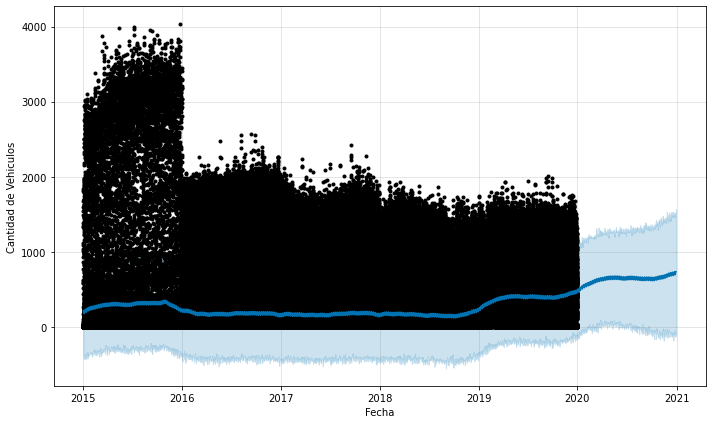

In [69]:
# A continuación graficamos lo ocurrido, lo predicho y las distintas variables
fig1 = m.plot(forecast,xlabel='Fecha',ylabel='Cantidad de Vehiculos', uncertainty=True)

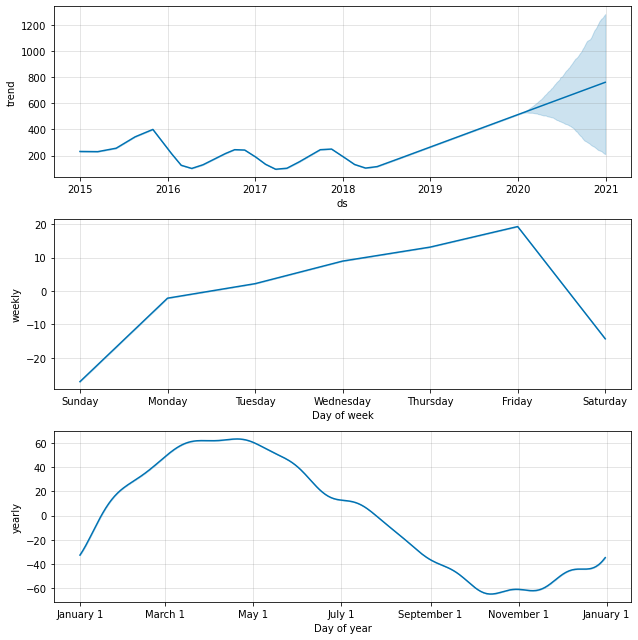

In [70]:
# Analizamos los componentes de la serie, calculando las componentes estacionales y tendencia de la misma.
fig2 = m.plot_components(forecast)